# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [24]:

from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
from skimage.filters import threshold_mean

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
def erosion(image,window):
    eroded_image = np.copy(image)
    edgex = window.shape[0] // 2
    edgey = window.shape[1] // 2
    for x in range(edgex, eroded_image.shape[0] - edgex - 1):
        for y in range(edgey, eroded_image.shape[1] - edgey - 1):
            erode = np.logical_and(eroded_image[x:x+window.shape[0],y:y+window.shape[1]],window) # 2d array of logical and
            if(any(False in sublist for sublist in erode)): # if there exist any false in the anding
                eroded_image[x+edgex//2,y+edgey//2] = 0
            else:
                eroded_image[x+edgex//2,y+edgey//2] = 1
    return eroded_image

def dilation(image,window):
    dialated_image = np.copy(image)
    edgex = window.shape[0] // 2
    edgey = window.shape[1] // 2
    for x in range(edgex, dialated_image.shape[0] - edgex - 1):
        for y in range(edgey, dialated_image.shape[1] - edgey - 1):
            dial = np.logical_and(dialated_image[x:x+window.shape[0],y:y+window.shape[1]],window) # 2d array of logical and
            if(any(True in sublist for sublist in dial)): # if there exist any false in the anding
                dialated_image[x+edgex//2,y+edgey//2] = 1
            else:
                dialated_image[x+edgex//2,y+edgey//2] = 0
    return dialated_image



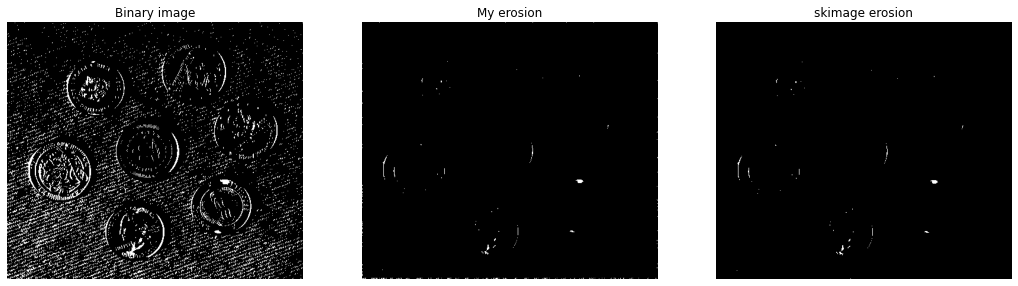

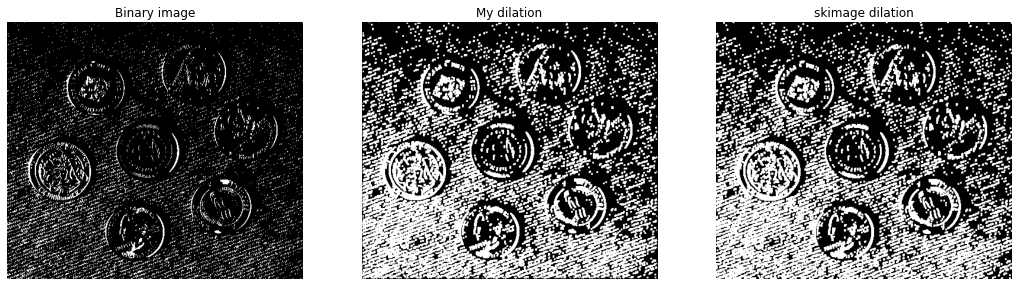

In [26]:
picture2 = io.imread('./img/coins.jpg')
grayImage = rgb2gray(picture2)
binaryImage = grayImage > 0.75
window = np.ones((3,3))

my_erosion = erosion(binaryImage,window)
sk_erosion = binary_erosion(binaryImage,window)
show_images([binaryImage,my_erosion,sk_erosion],['Binary image','My erosion','skimage erosion'])

my_dilation = dilation(binaryImage,window)
sk_dilation = binary_dilation(binaryImage,window)
show_images([binaryImage,my_dilation,sk_dilation],['Binary image','My dilation','skimage dilation'])

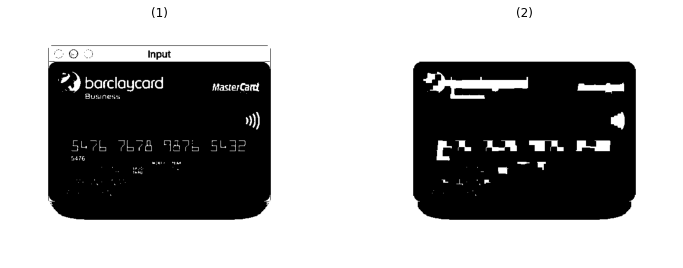

In [27]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
picture2 = io.imread('./img/card.jpg')
grayImage = rgb2gray(picture2)
thresh = threshold_mean(grayImage)
binaryImage = grayImage > 0.75



window = np.ones((11,11))
dialated_img = binary_dilation(binaryImage,window)
closing = binary_erosion(dialated_img,window)
show_images([binaryImage,closing])

In [28]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''


'\n3) Skeletonization:\n    - Load "horse.jpg" from the img folder \n    - Use a binary threshold of 0.9 to remove invisible noise in the background\n    - Use Skimage\'s "skeletonize(image)" to acquire the image\'s skeleton & show it\n    - Use Skimage\'s "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it\n'

In [29]:
horsePic = rgb2gray(io.imread('./img/horse.jpg'))

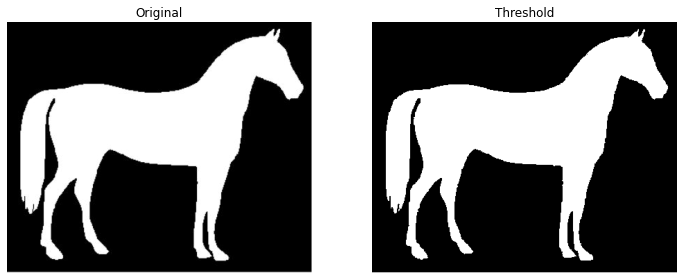

In [30]:
# print(horsePic)
horsePicThreshold = np.where(horsePic > 0.9, 1, 0)
show_images([horsePic,horsePicThreshold],["Original", "Threshold"])
# print(horsePicThreshold)

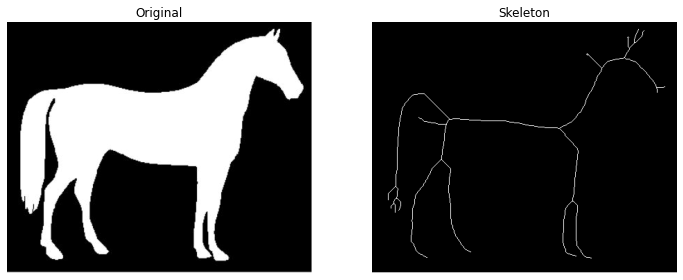

In [31]:
horseSkeleton = skeletonize(horsePicThreshold)
show_images([horsePic,horseSkeleton],["Original", "Skeleton"])

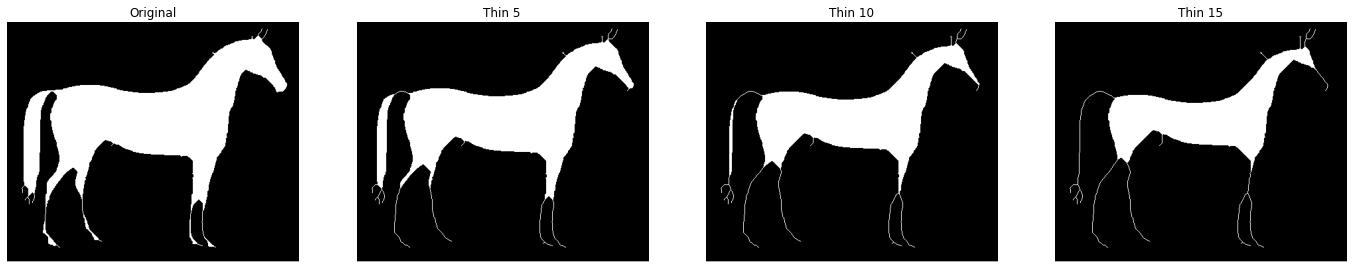

In [32]:
horsePicThin5 = thin(horsePicThreshold, 5)
horsePicThin10 =thin(horsePicThreshold, 10)
horsePicThin15 =thin(horsePicThreshold, 15)
horsePicThin20 =thin(horsePicThreshold, 20)
show_images([horsePicThin5,horsePicThin10,horsePicThin15,horsePicThin20],["Original", "Thin 5","Thin 10","Thin 15","Thin 20"])